# 6.3 Geographical Visualizations with Python

### 1. Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 
%matplotlib inline

In [4]:
# Import ".json" file for the USA
country_geo = r'C:\Users\ramis\OneDrive\JC\Data Analytics Course\Data Analytics Immersion\A6\Gun Violence\02 Data\Original Data\us-states.json'

In [5]:
country_geo

'C:\\Users\\ramis\\OneDrive\\JC\\Data Analytics Course\\Data Analytics Immersion\\A6\\Gun Violence\\02 Data\\Original Data\\us-states.json'

In [6]:
# Assign the path of the Gun Violence data folder to the variable 'path'.
path = r'C:\Users\ramis\OneDrive\JC\Data Analytics Course\Data Analytics Immersion\A6\Gun Violence'

In [7]:
# import data gun_violence_c3.pkl
df_gv = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'gun_violence_c3.pkl'))

In [8]:
df_gv.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,incident_characteristics,latitude,longitude,participant_age,participant_age_group,participant_gender,participant_status,participant_type,age_group_classification,severity_of_incident
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,14.0,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,-79.8559,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,Known Age Group,Mass Shooting
1,460726,2013-01-01,California,Hawthorne,1,3,43.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,-118.3330,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,Known Age Group,Mass Shooting
2,478855,2013-01-01,Ohio,Lorain,1,3,9.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,-82.1377,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,Known Age Group,Mass Shooting
3,478925,2013-01-05,Colorado,Aurora,4,0,6.0,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,-104.8020,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,Known Age Group,Mass Shooting
4,478959,2013-01-07,North Carolina,Greensboro,2,2,6.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,-79.9569,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,Known Age Group,Mass Shooting


### 2. Data wrangling
The data does not need wrangling for the 'state' column. The states are already in one column using compatible format. However, I will aggregate each of the 'n_killed', 'n_injured' and 'incident_id' to calcualate the average of 'n_killed', average of 'n_injured' and count of 'incident_id' for each state as this is what I want to show on the Choropleth maps.

In [14]:
# A list of unique vales of state names in the 'state' column
unique_states = df_gv['state'].unique()

# Print the result
print(unique_states)

['Pennsylvania' 'California' 'Ohio' 'Colorado' 'North Carolina' 'Oklahoma'
 'New Mexico' 'Louisiana' 'Maryland' 'Tennessee' 'Missouri'
 'District of Columbia' 'Illinois' 'Delaware' 'Utah' 'Michigan' 'Georgia'
 'Indiana' 'Mississippi' 'New York' 'Florida' 'Washington'
 'South Carolina' 'Arizona' 'Kentucky' 'New Jersey' 'Virginia' 'Wisconsin'
 'Rhode Island' 'Texas' 'Alabama' 'Kansas' 'Connecticut' 'West Virginia'
 'Minnesota' 'Nevada' 'Nebraska' 'Massachusetts' 'Hawaii' 'New Hampshire'
 'Iowa' 'Alaska' 'Arkansas' 'Idaho' 'Oregon' 'Wyoming' 'Maine'
 'North Dakota' 'Montana' 'Vermont' 'South Dakota']


In [29]:
# Aggregating the average of 'n_killed' and 'n_injured', and the count of 'incident_id', grouped by 'state'
agg_df_gv = df_gv.groupby('state').agg({'n_killed': 'mean','n_injured': 'mean','incident_id': 'count'}).reset_index()

# Renaming columns to reflect averages and counts
agg_df_gv.columns = ['state', 'average_n_killed', 'average_n_injured', 'count_incidents']

# Displaying the resulting sub-dataset
agg_df_gv.head() # This dataset will be used to create the Choropleth maps.

,state,average_n_killed,average_n_injured,count_incidents
0,Alabama,0.343630,0.547980,5471
1,Alaska,0.197924,0.240919,1349
2,Arizona,0.469931,0.470790,2328
3,Arkansas,0.271992,0.473962,2842
4,California,0.341101,0.468784,16306


### 3. Data cleaning
The data is already clean. The columns relevant to my geographical visualization ['state', 'n_killed', 'n_injured'] have neither missing nor extreme values. This has been already verified in E6.1 and I will revisit this topic below for confirmation.

In [13]:
# check for missing values in columns  ['state', 'n_killed', 'n_injured'] 
missing_values = df_gv[['state', 'n_killed', 'n_injured']].isnull()
num_missing_values = missing_values.sum()
# Print the result
print(num_missing_values)

state        0
n_killed     0
n_injured    0
dtype: int64


C:\Users\ramis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ramis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='n_killed', ylabel='Count'>

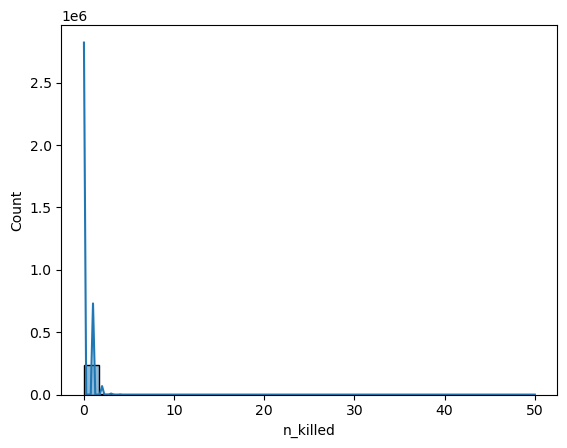

In [21]:
# Check for extrame values in the 'n_killed' column by creating a histogram
sns.histplot(df_gv['n_killed'], bins=30, kde = True)

In [19]:
# check how many extrme values we have in the 'n_killed' column. We will consider 'n_killed' > 20 extreme ( leaving enough margin for mass shooting incidents) 
df_gv[df_gv['n_killed'] >20]

,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,incident_characteristics,latitude,longitude,participant_age,participant_age_group,participant_gender,participant_status,participant_type,age_group_classification,severity_of_incident
130448,577157,2016-06-12,Florida,Orlando,50,53,5.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",28.5195,-81.3767,0::34||1::23||2::20||3::22||4::36||5::22||6::2...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male||5...,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,Known Age Group,Mass Shooting
217151,980577,2017-11-05,Texas,Sutherland Springs,27,20,28.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",29.2733,-98.0564,0::14||1::7||2::5||3::30||4::58||5::60||6::36|...,0::Teen 12-17||1::Child 0-11||2::Child 0-11||3...,0::Female||1::Female||2::Female||3::Female||4:...,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,Known Age Group,Mass Shooting


C:\Users\ramis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ramis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='n_injured', ylabel='Count'>

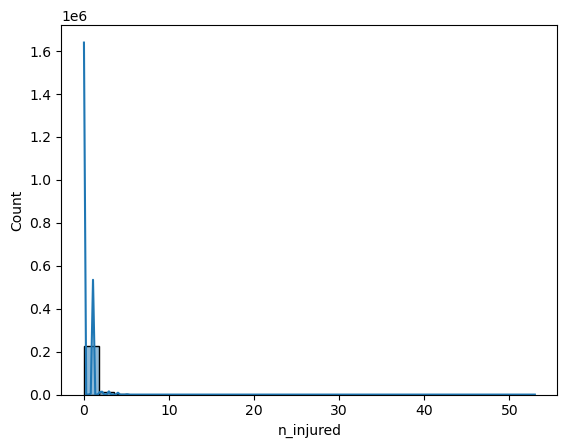

In [22]:
# Check for extrame values in the 'n_injured' column by creating a histogram
sns.histplot(df_gv['n_injured'], bins=30, kde = True)

In [23]:
# check how many extrme values we have in the 'n_injured' column. We will consider 'n_injured' > 20 extreme ( leaving enough margin for mass shooting incidents) 
df_gv[df_gv['n_injured'] >20]

,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,incident_characteristics,latitude,longitude,participant_age,participant_age_group,participant_gender,participant_status,participant_type,age_group_classification,severity_of_incident
130448,577157,2016-06-12,Florida,Orlando,50,53,5.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",28.5195,-81.3767,0::34||1::23||2::20||3::22||4::36||5::22||6::2...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male||5...,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,Known Age Group,Mass Shooting
195845,879953,2017-07-01,Arkansas,Little Rock,0,25,2.0,Shot - Wounded/Injured||Mass Shooting (4+ vict...,34.7434,-92.2727,0::16||1::25||2::21||3::19||4::23||5::25||6::3...,0::Teen 12-17||1::Adult 18+||2::Adult 18+||3::...,1::Male||2::Female||3::Female||5::Male||6::Mal...,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,Known Age Group,Mass Shooting


#### The extreme values found in 'n_injured' and 'n_killed' are related to the incident_id's 577157, 980577, 879953. The origial dataset on Kaggle contains columns called 'source-url', 'incident_url'. I have checked the relevant websites of the incidents and verified that the values are correct. These are valid entries. 

### 4. Create choropleth maps

In [50]:
# Create a base map with a center point and initial zoom level.
map2 = folium.Map(location=[40, -95], zoom_start=1.5)

# In this map, we visualize the average number of people injured by gun violence per state.
folium.Choropleth(
    geo_data=country_geo,  # The path to our US states geojson file.
    data=agg_df_gv,  # The DataFrame containing the data to be visualized.
    columns=['state', 'average_n_injured'],  # Columns containing the key and the value.
    key_on='feature.properties.name',  # Path within the geojson file to the key corresponding to the DataFrame.
    fill_color='YlOrBr',  # The color scheme for the choropleth.
    fill_opacity=0.6,  # The fill opacity for the choropleth shapes.
    line_opacity=0.1,  # The line opacity for the boundaries of the choropleth shapes.
    legend_name="Average Number Injured by Gun Violence"  # The title for the legend.
).add_to(map2)

# Display the map.
map2

In [51]:
map2.save('choropleth_map_n_i.html')

In [48]:
# Create a base map with a center point and initial zoom level.
map3 = folium.Map(location=[40, -95], zoom_start=1.5)

# In this map, we visualize the count of gun violence incidents per state.
folium.Choropleth(
    geo_data=country_geo,  # The path to our US states geojson file.
    data=agg_df_gv,  # The DataFrame containing the data to be visualized.
    columns=['state', 'count_incidents'],  # Columns containing the key and the value.
    key_on='feature.properties.name',  # Path within the geojson file to the key corresponding to the DataFrame.
    fill_color='YlOrBr',  # The color scheme for the choropleth.
    fill_opacity=0.6,  # The fill opacity for the choropleth shapes.
    line_opacity=0.1,  # The line opacity for the boundaries of the choropleth shapes.
    legend_name="Count of Incidents"  # The title for the legend.
).add_to(map3)

# Display the map.
map3

In [49]:
# Save the map
map3.save('choropleth_map_c_i.html')

In [52]:
# Create a base map with a center point and initial zoom level.
map1 = folium.Map(location=[40, -95], zoom_start=1.5)

# Choropleth maps combine geographic data with numerical data to create shaded regions.
# In this map, we visualize the average number of people killed by gun violence per state.
folium.Choropleth(
    geo_data=country_geo,  # The path to our US states geojson file.
    data=agg_df_gv,  # The DataFrame containing the data to be visualized.
    columns=['state', 'average_n_killed'],  # Columns containing the key and the value.
    key_on='feature.properties.name',  # Path within the geojson file to the key corresponding to the DataFrame.
    fill_color='YlOrBr',  # The color scheme for the choropleth.
    fill_opacity=0.6,  # The fill opacity for the choropleth shapes.
    line_opacity=0.1,  # The line opacity for the boundaries of the choropleth shapes.
    legend_name="Average Number Killed by Gun Violence"  # The title for the legend.
).add_to(map1)

# Display the map.
map1

In [53]:
map1.save('choropleth_map_n_k.html')

### 6. Discuss the map:
-The choropleth map in "map1" displays the average number of individuals killed due to gun violence in the United States, broken down by state. The southern states, particularly in the southeast region, show darker shades, suggesting a higher average number of deaths due to gun violence. The central and northern states have lighter colors, indicating a lower average number. 

-"map3" answers one of my questions: "What are the states with the highest number of gun violence incidents?" The top 4 states which we can identify from the dark color on the map are Illinois, California, Florida, and Texas.

-The analysis led me to the following research question: How can I adjust the figures of fatalities in each state to account for population differences? The proposed method would involve applying the following calculation for each state: (total of 'n_killed' divided by the state's present population) multiplied by 100. To proceed with this, it will be necessary to augment the existing dataset with population figures, which are currently not included.

### 7. Exporting the agg_df_gv dataframe to pkl

In [54]:
# export agg_df_gv to pkl to save the changes
agg_df_gv.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'agg_df_gv.pkl'))